***Testing pipeline on unseen data***

In [ ]:
import joblib
pipeline = joblib.load('/content/pipeline(new).joblib')

In [ ]:
import pandas as pd
X_test = pd.read_csv('/content/unseenx.csv')
y_test = pd.read_csv('/content/unseeny.csv')

In [ ]:
y_test.drop(columns=y_test.columns[0], axis=1,  inplace=True)

In [ ]:
import tensorflow as tf
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import regularizers, optimizers
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from imblearn.over_sampling import ADASYN
from imblearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import pandas as pd

Epoch 1/3
465/465 [==============================] - 4s 9ms/step - loss: 0.3631 - accuracy: 0.8586 - val_loss: 0.3336 - val_accuracy: 0.9903
Epoch 2/3
465/465 [==============================] - 3s 6ms/step - loss: 0.3614 - accuracy: 0.8594 - val_loss: 0.3008 - val_accuracy: 0.9867
Epoch 3/3
284/284 [==============================] - 0s 1ms/step
Class distribution in oversampled testing data:
hazardous
0            8200
1             884
dtype: int64
 Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.78      0.87      8200
           1       0.32      0.96      0.48       884

    accuracy                           0.80      9084
   macro avg       0.66      0.87      0.68      9084
weighted avg       0.93      0.80      0.84      9084

testing CM:


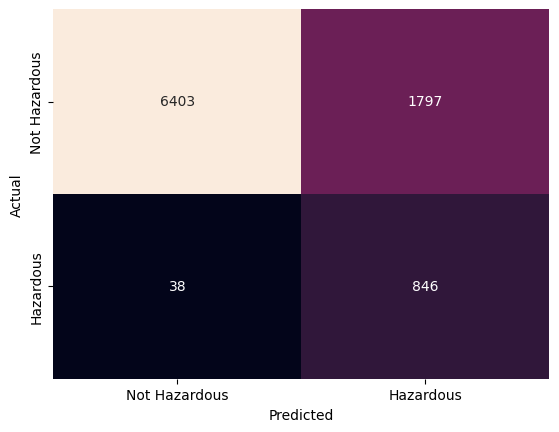

In [ ]:
# Fit the pipeline on the training data
pipeline.fit(X_test, y_test, model__epochs=3, model__batch_size=32, model__validation_split=0.1, model__verbose=1)

# Predictions on training set
y_test_pred_proba = pipeline.predict(X_test)
y_test_pred = (y_test_pred_proba > 0.7).astype(int)
test_f1 = f1_score(y_test, y_test_pred)

# Print class distribution within each fold
print(f'Class distribution in oversampled testing data:')
print(y_test.value_counts())


print(f' Classification Report:')
fold_report = classification_report(y_test, y_test_pred)
print(fold_report)

# Plot confusion matrix
print("testing CM:")
cm = confusion_matrix(y_test, y_test_pred)
sb.heatmap(cm, annot=True, fmt='d', cbar=False,
               xticklabels=['Not Hazardous', 'Hazardous'], yticklabels=['Not Hazardous', 'Hazardous'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()